In [2]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import skimage.io as io

filenames = os.listdir("./clouds")
classes = []
for image in filenames :
    category = image.split('_')[0] # Categoria
    if category == 'cloud' :
        classes.append(1) # cloud
    else :    
        classes.append(0) # sun

data = []
classes = np.array(classes)
filenames = np.array(filenames)

In [23]:
counter=0
for file in filenames:
    img = cv2.imread("./clouds/"+file)
    grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grayImage = cv2.resize(grayImage,(30,30))

    # cv2.imshow('asd', grayImage)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    # break

    grayImage = grayImage.reshape(1, -1)
    
    # grayImage = np.array(grayImage).flatten()

    data.append([grayImage, classes[counter]])
    counter+=1

np.random.shuffle(data)
pickle_in = open('data.pickle', 'wb')
pickle.dump(data, pickle_in)
pickle_in.close()

In [3]:
from sklearn.model_selection import train_test_split

pickle_in = open('data.pickle', 'rb')
data = pickle.load(pickle_in)
pickle_in.close()

data = np.array(data)

# data = data[:100]

features = data[:,0]
labels = data[:,1]

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=.3, shuffle=True)

# print(labels[5])
# plt.imshow(features[5].reshape(30, 30))

C:\Users\arman\AppData\Local\Temp/ipykernel_16604/2502629802.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array(data)


In [4]:
def runNeuralNet (X, y, _activation, _shuffle, _max_iter=10000, r=0.001, alpha=0):
    lastLoss = 10
    while lastLoss > .1:
        mlp = MLPClassifier(
                                solver='sgd',
                                shuffle=_shuffle,
                                activation=_activation,
                                max_iter=_max_iter,
                                tol=1e-10,
                                hidden_layer_sizes=(1),
                                momentum=alpha,
                                learning_rate_init=r,
                                verbose=False)
        mlp.fit(X, y)
        lastLoss = np.array(mlp.loss_curve_).min()
    
    print('Score: ', mlp.score(X, y))
    print('Number of iterations: ', mlp.n_iter_)
    print('Loss: ', lastLoss)

    return mlp

In [5]:
x_train = np.vstack(x_train)
y_train = y_train.astype('int')

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = np.vstack(x_test)
y_test = y_test.astype('int')

print("----------")
print(x_train.shape)
print(y_train.shape)
print("----------")

mlp = runNeuralNet(x_train, y_train, _activation='relu', _shuffle=True, _max_iter=1000000, alpha=1)



----------
(140, 900)
(140,)
----------
Score:  1.0
Number of iterations:  537
Loss:  7.236956841693479e-05


(60, 900)
(60,)
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.94      1.00      0.97        34

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.97        60
weighted avg       0.97      0.97      0.97        60

[1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0
 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0]
-------
[1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0
 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0]


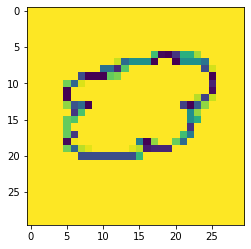

In [8]:
from sklearn.metrics import classification_report

print(x_test.shape)
print(y_test.shape)

y_predicted = mlp.predict(x_test)

print(classification_report(y_true=y_test, y_pred=y_predicted))

print(y_predicted)
print("-------")
print(y_test)

# plt.imshow(x_test[1].reshape(30, 30))
# plt.show()